Week_5_of_AI_Saturdays_Lagos_Cohort_9_Assessment_Flipped!_🎉

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   Movie ID                     Title Release Date  Popularity  Vote Average  \
0    755898         War of the Worlds   2025-07-29   2650.3528         4.535   
1   1234821    Jurassic World Rebirth   2025-07-01    672.6363         6.400   
2    986206             Night Carnage   2025-07-29    665.7754         5.500   
3   1087192  How to Train Your Dragon   2025-06-06    481.5359         8.022   
4   1100988            28 Years Later   2025-06-18    415.3521         6.916   

   Vote Count                                           Overview  \
0         173  Will Radford is a top analyst for Homeland Sec...   
1         979  Five years after the events of Jurassic World ...   
2          20  A blogger who is also a werewolf meets a dashi...   
3        1455  On the rugged isle of Berk, where Vikings and ...   
4         929  Twenty-eight years since the rage virus escape...   

                                         Poster Path  
0  https://image.tmdb.org/t/p/w500/yvirUYrva23Iud...  


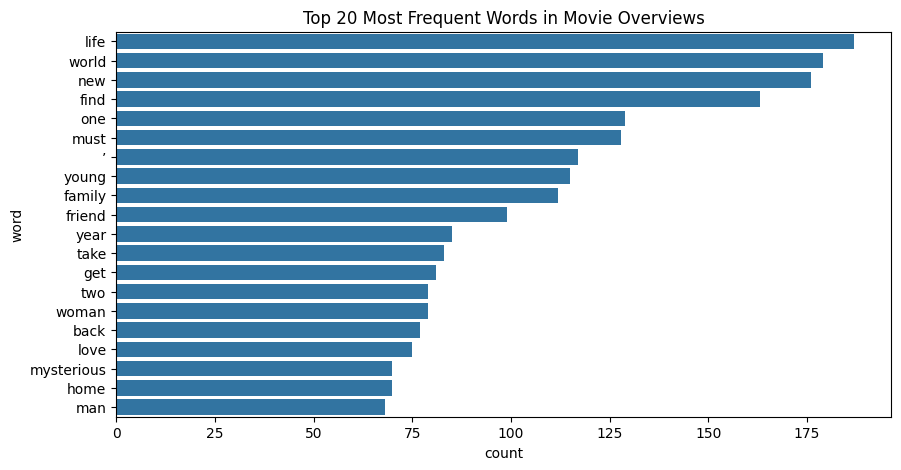

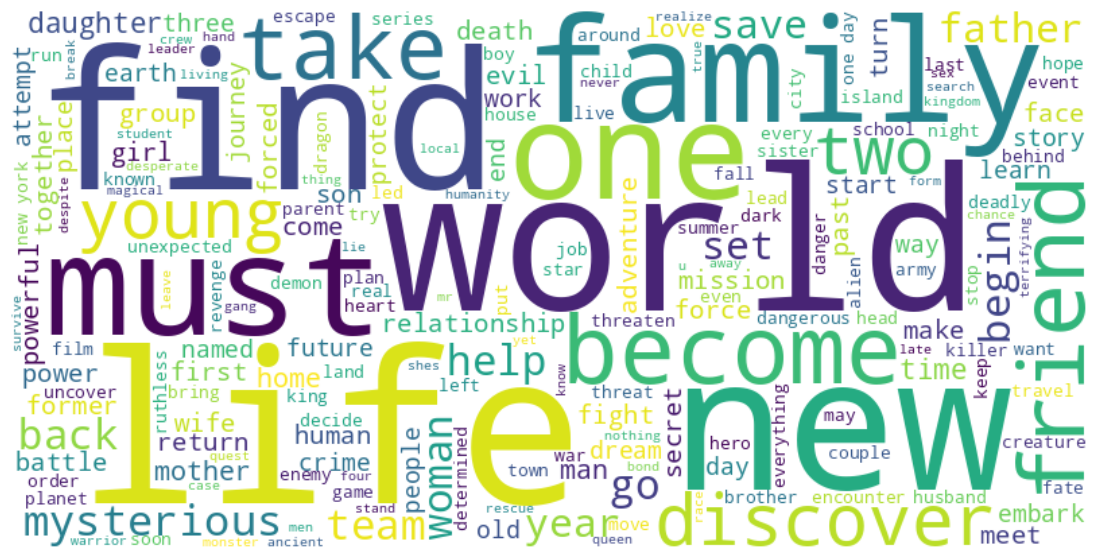

BoW Shape: (995, 1000)
TF-IDF Shape: (995, 1000)
Top 20 Bigrams:
['and his' 'and the' 'as the' 'by the' 'for the' 'from the' 'in the'
 'into the' 'of her' 'of his' 'of the' 'on the' 'the world' 'to be'
 'to find' 'to save' 'to the' 'who is' 'with his' 'with the']


In [1]:
# ==============================
# Step 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download NLTK dependencies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ==============================
# Step 2: Load Dataset
# ==============================
df = pd.read_csv("/content/drive/MyDrive/Classroom/kaggle/tmdb_movies_dataset.csv")   # adjust path if needed
#df.head()
print(df.head())
print(df.info())

# Let's focus on the "overview" column for text analysis
df = df[['Title', 'Overview']].dropna()

# ==============================
# Step 3: Basic Preprocessing
# ==============================
def clean_text(text):
    text = text.lower()                                   # lowercase
    text = re.sub(r'\[.*?\]', '', text)                   # remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)     # remove URLs
    text = re.sub(r'<.*?>+', '', text)                    # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', ' ', text)                       # remove line breaks
    text = re.sub(r'\w*\d\w*', '', text)                  # remove words containing numbers
    return text

df['clean_overview'] = df['Overview'].apply(lambda x: clean_text(x))
print(df[['Overview', 'clean_overview']].head())

# ==============================
# Step 4: Tokenization
# ==============================
df['tokens'] = df['clean_overview'].apply(nltk.word_tokenize)
print(df['tokens'].head())

# ==============================
# Step 5: Remove Stopwords
# ==============================
stop_words = set(stopwords.words('english'))
df['tokens_no_stop'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(df['tokens_no_stop'].head())

# ==============================
# Step 6: Lemmatization
# ==============================
lemmatizer = WordNetLemmatizer()
df['lemmas'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(df['lemmas'].head())

# ==============================
# Step 7: Exploratory Word Frequency
# ==============================
all_words = [word for tokens in df['lemmas'] for word in tokens]
word_freq = Counter(all_words)
print(word_freq.most_common(20))

# Plot Top 20 words
common_words = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='word', data=common_words)
plt.title("Top 20 Most Frequent Words in Movie Overviews")
plt.show()

# ==============================
# Step 8: Word Cloud
# ==============================
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# ==============================
# Step 9: Bag of Words (CountVectorizer)
# ==============================
vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(df['clean_overview'])
print("BoW Shape:", X_bow.shape)

# ==============================
# Step 10: TF-IDF Representation
# ==============================
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(df['clean_overview'])
print("TF-IDF Shape:", X_tfidf.shape)

# ==============================
# Step 11: N-Gram Analysis (Bigrams)
# ==============================
vectorizer_bigram = CountVectorizer(ngram_range=(2,2), max_features=20)
X_bigram = vectorizer_bigram.fit_transform(df['clean_overview'])
print("Top 20 Bigrams:")
print(vectorizer_bigram.get_feature_names_out())
